In [12]:
from keras.models import load_model
from keras.models import Model

In [13]:
model = load_model('face_recog_model.h5')

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.output_shape

(None, 4)

In [16]:
import cv2
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

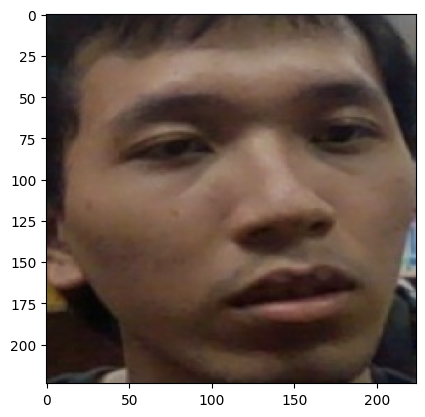

In [17]:
img = cv2.imread('images/validation_set/class-0/43.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
def prepare_image(img):
    img = cv2.resize(img, (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [19]:
def predict_image(img):
    img = prepare_image(img)
    prediction = model.predict(img)
    return prediction

In [20]:
img = cv2.imread('images/validation_set/class-0/43.jpg')
prediction = predict_image(img)

1/1 [==============================] - 1s 694ms/step


In [21]:
from mtcnn import MTCNN
def crop_face(img):
    detector = MTCNN()
    faces = detector.detect_faces(img)
    if len(faces) == 0:
        return None
    x, y, w, h = faces[0]['box']
    return img[y:y+h, x:x+w]

In [22]:
classes = ['Pond' , 'Blue', 'Tar', 'New']
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if ret:
        face = crop_face(frame)
        if face is not None:
            prediction = predict_image(face)
            arg = np.argmax(prediction)
            cv2.putText(frame, classes[arg], (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 187ms/step
